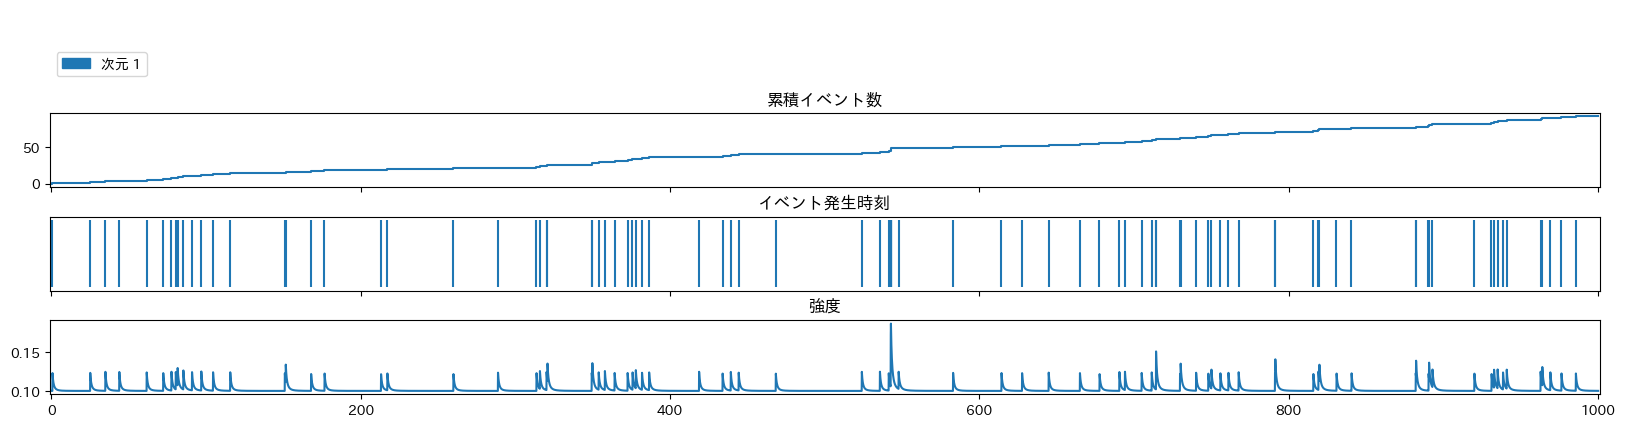

[7.48394751e-01 2.51546594e+01 3.49903373e+01 4.39829683e+01
 6.16711199e+01 7.23423392e+01 7.76812159e+01 8.04273310e+01
 8.16409293e+01 8.53892131e+01 9.09600826e+01 9.69899130e+01
 1.04567874e+02 1.15672873e+02 1.50935278e+02 1.51558598e+02
 1.67908168e+02 1.76623485e+02 2.13102050e+02 2.17205623e+02
 2.59906312e+02 2.88762404e+02 3.13643905e+02 3.15848965e+02
 3.20156875e+02 3.20766039e+02 3.49353415e+02 3.49722763e+02
 3.53828022e+02 3.57886866e+02 3.64135943e+02 3.72543134e+02
 3.75726284e+02 3.77860609e+02 3.81814786e+02 3.86442595e+02
 4.18794666e+02 4.33926808e+02 4.39275249e+02 4.44343196e+02
 4.68323491e+02 5.23992674e+02 5.35695785e+02 5.41324451e+02
 5.42613400e+02 5.42615571e+02 5.42673933e+02 5.42747622e+02
 5.47719687e+02 5.82954350e+02 6.14248760e+02 6.27542609e+02
 6.44763423e+02 6.64945216e+02 6.77603168e+02 6.90483249e+02
 6.94064434e+02 7.04848731e+02 7.11361883e+02 7.14182070e+02
 7.14198344e+02 7.29602064e+02 7.30026073e+02 7.40052816e+02
 7.47916164e+02 7.499861

In [1]:
from hawkes import PowLawKernelModel
import numpy as np

T = 1000
mu = 0.1
K = 0.2
p = 3
c = 2

pow_law_model = PowLawKernelModel()
result = pow_law_model.simulate(mu, K, p, c, T, 0.1)
result.plot()
kjprint(result.events)

In [26]:
from hawkes import GradientOptimizerSettings

T = 1000
events = np.array([ 19.03,  21.85,  22.75,  25.31,  28.88,  28.88,  79.76,  93.24,  93.60,  94.75,
  97.55, 123.26, 134.45, 157.04, 169.94, 172.75, 176.84, 178.42, 180.55, 183.40,
 199.29, 206.09, 207.76, 221.16, 237.77, 248.97, 254.65, 265.53, 267.23, 275.20,
 288.90, 300.13, 302.21, 306.31, 318.24, 325.32, 334.31, 339.29, 356.17, 356.46,
 359.77, 370.79, 383.86, 391.06, 392.75, 409.81, 417.57, 426.35, 428.58, 443.11,
 446.51, 457.56, 463.91, 493.78, 501.32, 516.26, 517.18, 528.01, 548.91, 555.91,
 591.14, 617.12, 623.07, 626.55, 629.13, 636.71, 646.97, 652.27, 681.68, 698.16,
 711.37, 732.33, 739.79, 782.71, 782.76, 785.41, 804.34, 807.06, 807.48, 812.84,
 813.27, 829.77, 830.03, 843.89, 875.51, 878.65, 888.08, 889.22, 894.27, 903.50,
 905.74, 928.83, 944.54, 954.14, 955.31, 957.40, 969.53, 975.75, 991.29, 995.50])

settings = GradientOptimizerSettings(
    learning_rate=0.00001,
    max_iter=100000,
    tol=0.001,
    init_params={
        "mu": 0.01,
        "K": 0.5,
        "p": 1.5,
        "c": 1.5,
    },
)
fitted_params = pow_law_model.fit(events, T, settings)

score = pow_law_model.score(
    mu=fitted_params[0],
    K=fitted_params[1],
    p=fitted_params[2],
    c=fitted_params[3],
    events=events,
    T=T,
)


print(fitted_params)
print(score)

iter: 0, params: [0.02009448 0.50008977 1.49936304 1.50009947], grad: [1009.44778376    8.97741901  -63.69645288    9.9469942 ]
iter: 1000, params: [0.08334688 0.17182036 1.61990221 1.56565106], grad: [  1.83958206 -20.61504838   4.03042616   2.15182276]
iter: 2000, params: [0.0956702  0.04041845 1.6369148  1.5737196 ], grad: [ 0.74360694 -7.28747047  0.45898642  0.1315697 ]
iter: 3000, params: [ 1.00063181e-01 -7.70462629e-04  1.63841187e+00  1.57399037e+00], grad: [ 2.18732780e-01 -1.95352687e+00 -5.24367074e-03  5.86742919e-04]
iter: 4000, params: [ 0.10124316 -0.01115292  1.63797282  1.57410683], grad: [ 0.05329604 -0.46117729 -0.06486052  0.02161186]
iter: 5000, params: [ 0.10152438 -0.01356905  1.63725866  1.57437421], grad: [ 0.01255724 -0.10649768 -0.07532306  0.03006701]
iter: 6000, params: [ 0.1015921  -0.01413473  1.63649083  1.57468812], grad: [ 0.00322826 -0.02603051 -0.07772601  0.03222447]
iter: 7000, params: [ 0.10161137 -0.01428305  1.6357092   1.57501371], grad: [ 0.0

In [24]:
T = 1000
events = np.array([ 19.03,  21.85,  22.75,  25.31,  28.88,  28.88,  79.76,  93.24,  93.60,  94.75,
  97.55, 123.26, 134.45, 157.04, 169.94, 172.75, 176.84, 178.42, 180.55, 183.40,
 199.29, 206.09, 207.76, 221.16, 237.77, 248.97, 254.65, 265.53, 267.23, 275.20,
 288.90, 300.13, 302.21, 306.31, 318.24, 325.32, 334.31, 339.29, 356.17, 356.46,
 359.77, 370.79, 383.86, 391.06, 392.75, 409.81, 417.57, 426.35, 428.58, 443.11,
 446.51, 457.56, 463.91, 493.78, 501.32, 516.26, 517.18, 528.01, 548.91, 555.91,
 591.14, 617.12, 623.07, 626.55, 629.13, 636.71, 646.97, 652.27, 681.68, 698.16,
 711.37, 732.33, 739.79, 782.71, 782.76, 785.41, 804.34, 807.06, 807.48, 812.84,
 813.27, 829.77, 830.03, 843.89, 875.51, 878.65, 888.08, 889.22, 894.27, 903.50,
 905.74, 928.83, 944.54, 954.14, 955.31, 957.40, 969.53, 975.75, 991.29, 995.50])

score = pow_law_model.score(
    mu=0.10000000127848407,
    K=6.47343761308971,
    p=5.190740303370453,
    c=58.8681796018331,
    events=events,
    T=T,
)

print(score)

-330.25860536751594


In [4]:
true_score = pow_law_model.score(
    mu=0.1,
    K=0.2,
    p=3,
    c=2,
    events=result.events,
    T=T,
)
print(true_score)

-317.69353731814033


In [6]:
random_search_params = pow_law_model.fit(events=result.events, T=T)

回数: 0
ベストスコア更新: -3444.792
パラメータ: {'mu': array([3.56165027]), 'K': array([[7.65336244]]), 'p': array([[8.36304547]]), 'c': array([[7.4191399]])}
回数: 1
ベストスコア更新: -3360.366
パラメータ: {'mu': array([3.47495879]), 'K': array([[6.90536757]]), 'p': array([[8.77884292]]), 'c': array([[7.83535169]])}
回数: 2
ベストスコア更新: -2772.199
パラメータ: {'mu': array([2.86897588]), 'K': array([[6.34243939]]), 'p': array([[9.66992459]]), 'c': array([[3.24388557]])}
回数: 3
ベストスコア更新: -1126.037
パラメータ: {'mu': array([1.11888494]), 'K': array([[7.0837776]]), 'p': array([[4.30090096]]), 'c': array([[4.28073921]])}
回数: 4
ベストスコア更新: -899.385
パラメータ: {'mu': array([0.88594404]), 'K': array([[2.08600627]]), 'p': array([[8.27405259]]), 'c': array([[2.41141936]])}
回数: 18
ベストスコア更新: -611.102
パラメータ: {'mu': array([0.47957703]), 'K': array([[4.67626695]]), 'p': array([[1.65182472]]), 'c': array([[4.18033867]])}
回数: 49
ベストスコア更新: -379.013
パラメータ: {'mu': array([0.25213788]), 'K': array([[1.08640216]]), 'p': array([[4.6812428]]), 'c': array([[8.77

KeyboardInterrupt: 